In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [4]:
layer1 = Input((1,),name ='Input_layer')
layer2 = Dense(32, activation='relu')(layer1)
layer3= Dense(64,activation='relu')(layer2)
layer4= Dense(128, activation='relu')(layer3)
layer5=Dense(1,name='Output_layer')(layer4)

dnn_model = Model(layer1,layer5)

In [5]:
dnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
def equation(value):
    return 5*value**3 - 10*value**2 - 20*value +10

In [8]:
x = np.linspace(-20,20,30000)
y = equation(x)

In [9]:
x.shape

(30000,)

In [10]:
y.shape

(30000,)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [13]:
x_shaping = x.reshape(-1,1)
y_shaping = y.reshape(-1,1)

In [14]:
x.shape

(30000,)

In [15]:
x_scaled = scaler.fit_transform(x_shaping).flatten()
y_scaled = scaler.fit_transform(y_shaping).flatten()

In [16]:
x_scaled.shape,y_scaled.shape

((30000,), (30000,))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_x,remaining_x, train_y,remaining_y = train_test_split(x_scaled,y_scaled, train_size=0.9, random_state=50)

In [19]:
train_x.shape

(27000,)

In [20]:
train_x,remaining_x, train_y,remaining_y = train_test_split(x_scaled,y_scaled, train_size=0.9, random_state=50)


In [21]:
val_x,test_x,val_y,test_y = train_test_split(remaining_x,remaining_y, train_size=.5,random_state=50)

In [22]:
val_x.shape

(1500,)

In [23]:
dnn_model.compile(loss='mse',metrics=[tf.keras.metrics.R2Score()])

In [24]:
h = dnn_model.fit(train_x,train_y,epochs=13,batch_size=64,validation_data=(val_x,val_y))

Epoch 1/13
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0154 - r2_score: 0.8928 - val_loss: 6.4910e-04 - val_r2_score: 0.9954
Epoch 2/13
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.8002e-04 - r2_score: 0.9959 - val_loss: 6.2970e-05 - val_r2_score: 0.9996
Epoch 3/13
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.8803e-04 - r2_score: 0.9973 - val_loss: 2.2856e-05 - val_r2_score: 0.9998
Epoch 4/13
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3291e-04 - r2_score: 0.9976 - val_loss: 1.2548e-04 - val_r2_score: 0.9991
Epoch 5/13
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0453e-04 - r2_score: 0.9979 - val_loss: 3.2772e-05 - val_r2_score: 0.9998
Epoch 6/13
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3776e-04 - r2_score: 0.9983 - val_loss: 1.9911e-04 - val_r2_score: 0.9986
Epoch 7/13
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3716e-04 - r2_score: 0.9983 - val_loss: 4.8107e-04 - val_r2_score: 0.9966
Epoch 8/13
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step 

In [25]:
h.history

{'loss': [0.005167354363948107,
  0.0005499985418282449,
  0.00038376194424927235,
  0.0003160095075145364,
  0.00027248859987594187,
  0.00023566369782201946,
  0.00022379712027031928,
  0.00020954306819476187,
  0.00019792388775385916,
  0.0001859692856669426,
  0.00018735858611762524,
  0.00017103955906350166,
  0.0001648498873692006],
 'r2_score': [0.9636598825454712,
  0.9961320757865906,
  0.9973011612892151,
  0.9977776408195496,
  0.9980837106704712,
  0.9983426928520203,
  0.9984261393547058,
  0.9985263347625732,
  0.9986080527305603,
  0.9986921548843384,
  0.9986823797225952,
  0.9987971186637878,
  0.9988406896591187],
 'val_loss': [0.0006490966188721359,
  6.29695932730101e-05,
  2.28556091315113e-05,
  0.00012547722144518048,
  3.277172436355613e-05,
  0.00019910794799216092,
  0.00048106626491062343,
  0.0009233983582817018,
  0.00012640113709494472,
  0.0003678039647638798,
  1.7267748262383975e-05,
  0.0002747999387793243,
  1.7066926375264302e-05],
 'val_r2_score': [

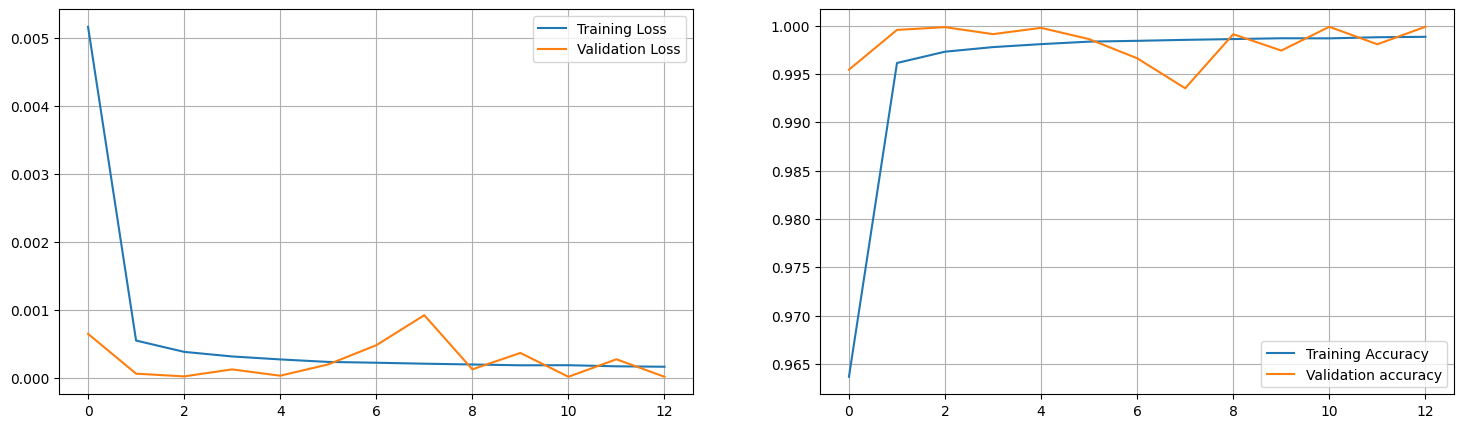

In [29]:
performance= h.history
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(performance['loss'],label='Training Loss')
plt.plot(performance['val_loss'],label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(performance['r2_score'],label='Training Accuracy')
plt.plot(performance['val_r2_score'],label='Validation accuracy')
plt.legend()
plt.grid()


plt.show()

In [27]:
pred_y = dnn_model.predict(test_x)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


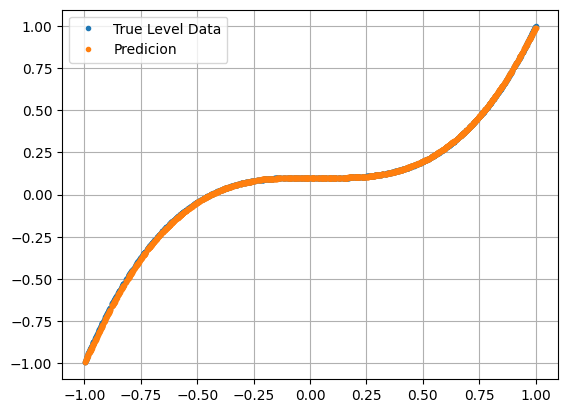

In [28]:
plt.plot(test_x, test_y, '.', label='True Level Data')
plt.plot(test_x, pred_y,'.', label='Predicion')

plt.legend()
plt.grid()

plt.show()
